## 경기도 코로나19 발생동향 분석
 http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/

In [1]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [5]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"2.xlsx"
file_name

'2.xlsx'

In [6]:
# read_excel 로 excel 파일을 불러와 주세요.
df = pd.read_excel(file_name)
df.shape

(20336, 16)

In [7]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values('연번',ascending=False)
df

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,20336,80121,M,73,70,2021. 2. 4.,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN
1,20335,80131,M,34,30,2021. 2. 4.,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN
2,20334,80122,F,62,60,2021. 2. 4.,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN
3,20333,80104,F,64,60,2021. 2. 4.,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN
4,20332,80103,M,39,30,2021. 2. 4.,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20331,5,15,M,42,40,2020. 2. 5.,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,Primary,,Primary
20332,4,14,F,40,40,2020. 2. 2.,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,접촉자,,접촉자
20333,3,12,M,48,40,2020. 2. 1.,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,Primary,,Primary
20334,2,4,M,55,50,2020. 1. 27.,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,Primary,,Primary


In [8]:
# head 로 미리보기를 합니다.
df.head()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,20336,80121,M,73,70,2021. 2. 4.,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN
1,20335,80131,M,34,30,2021. 2. 4.,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN
2,20334,80122,F,62,60,2021. 2. 4.,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN
3,20333,80104,F,64,60,2021. 2. 4.,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN
4,20332,80103,M,39,30,2021. 2. 4.,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN


In [9]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
20331,5,15,M,42,40,2020. 2. 5.,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,Primary,,Primary
20332,4,14,F,40,40,2020. 2. 2.,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,접촉자,,접촉자
20333,3,12,M,48,40,2020. 2. 1.,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,Primary,,Primary
20334,2,4,M,55,50,2020. 1. 27.,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,Primary,,Primary
20335,1,3,M,54,50,2020. 1. 26.,2020. 1. 22.,,고양-1,고양일산서,,해외유입,grp01,Primary,,Primary


## 시각화 도구 불러오기

<AxesSubplot:title={'center':'한글'}>

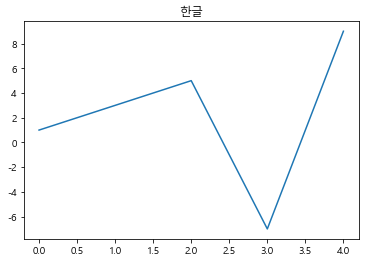

In [10]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

#한글폰트 사용시 마이너스값이 깨지는 현상 해결하기
plt.rc("axes", unicode_minus=False)

#그래프에 한글로 타이틀 입력
pd.Series([1,3,5,-7,9]).plot(title="한글")

## 확진일

In [11]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일자"].value_counts()

2020. 12. 15.    411
2020. 12. 22.    330
2021. 1. 6.      323
2020. 12. 11.    309
2020. 12. 14.    304
                ... 
2020. 1. 27.       1
2020. 4. 23.       1
2020. 7. 19.       1
2020. 5. 3.        1
2020. 5. 6.        1
Name: 확진일자, Length: 355, dtype: int64

In [12]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일자"].head()

0    2021. 2. 4.
1    2021. 2. 4.
2    2021. 2. 4.
3    2021. 2. 4.
4    2021. 2. 4.
Name: 확진일자, dtype: object

In [13]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.

df["확진일자"] = pd.to_datetime(df["확진일자"])
df

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,20336,80121,M,73,70,2021-02-04,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN
1,20335,80131,M,34,30,2021-02-04,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN
2,20334,80122,F,62,60,2021-02-04,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN
3,20333,80104,F,64,60,2021-02-04,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN
4,20332,80103,M,39,30,2021-02-04,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20331,5,15,M,42,40,2020-02-05,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,Primary,,Primary
20332,4,14,F,40,40,2020-02-02,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,접촉자,,접촉자
20333,3,12,M,48,40,2020-02-01,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,Primary,,Primary
20334,2,4,M,55,50,2020-01-27,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,Primary,,Primary


In [14]:
df["확진일자"].head()

0   2021-02-04
1   2021-02-04
2   2021-02-04
3   2021-02-04
4   2021-02-04
Name: 확진일자, dtype: datetime64[ns]

In [16]:
df["확진일자"].describe(datetime_is_numeric=True)

count                            20336
mean     2020-11-17 04:10:10.385522944
min                2020-01-26 00:00:00
25%                2020-10-22 00:00:00
50%                2020-12-14 00:00:00
75%                2021-01-03 00:00:00
max                2021-02-04 00:00:00
Name: 확진일자, dtype: object

In [17]:
# 월만 추출합니다.
df["월"] = df["확진일자"].dt.month
df

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월
0,20336,80121,M,73,70,2021-02-04,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN,2
1,20335,80131,M,34,30,2021-02-04,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN,2
2,20334,80122,F,62,60,2021-02-04,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN,2
3,20333,80104,F,64,60,2021-02-04,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN,2
4,20332,80103,M,39,30,2021-02-04,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20331,5,15,M,42,40,2020-02-05,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,Primary,,Primary,2
20332,4,14,F,40,40,2020-02-02,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,접촉자,,접촉자,2
20333,3,12,M,48,40,2020-02-01,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,Primary,,Primary,2
20334,2,4,M,55,50,2020-01-27,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,Primary,,Primary,1


In [18]:
# 해당 연도의 몇번째 "주"인지 추출합니다.
df["주"] = df['확진일자'].dt.week
df

<ipython-input-18-0cfc029536b2>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df['확진일자'].dt.week


,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월,주
0,20336,80121,M,73,70,2021-02-04,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN,2,5
1,20335,80131,M,34,30,2021-02-04,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN,2,5
2,20334,80122,F,62,60,2021-02-04,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN,2,5
3,20333,80104,F,64,60,2021-02-04,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN,2,5
4,20332,80103,M,39,30,2021-02-04,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20331,5,15,M,42,40,2020-02-05,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,Primary,,Primary,2,6
20332,4,14,F,40,40,2020-02-02,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,접촉자,,접촉자,2,5
20333,3,12,M,48,40,2020-02-01,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,Primary,,Primary,2,5
20334,2,4,M,55,50,2020-01-27,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,Primary,,Primary,1,5


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

<AxesSubplot:title={'center':'확진일자별 확진자 수'}>

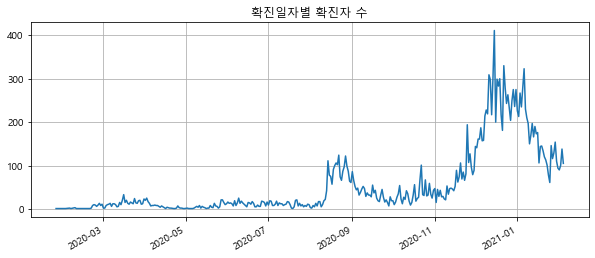

In [19]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().plot(title="확진일자별 확진자 수",
                               figsize=(10,4),
                               grid=True)

### 확진자가 가장 많이 나온 날

In [20]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
df["확진일자"].describe()

<ipython-input-20-e5fd44a8918a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["확진일자"].describe()


count                   20336
unique                    355
top       2020-12-15 00:00:00
freq                      411
first     2020-01-26 00:00:00
last      2021-02-04 00:00:00
Name: 확진일자, dtype: object

In [21]:
# 확진자가 가장 많았던 날을 찾습니다.
df[df["확진일자"] == '2020-12-15']

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월,주
6863,13473,56835,M,62,60,2020-12-15,NaN,무증상,하남-246,하남,,불명확,,NaN,,NaN,12,51
8396,11940,49800,M,20,20,2020-12-15,NaN,무증상,파주-306,파주,,불명확,,NaN,,NaN,12,51
9461,10875,47344,F,54,50,2020-12-15,2020. 12. 14.,,고양-1099,고양일산동,,불명확,,NaN,,NaN,12,51
9462,10874,47300,M,40,40,2020-12-15,2020. 12. 14.,,평택-617,평택,,불명확,,NaN,,NaN,12,51
9463,10873,47026,M,18,10,2020-12-15,NaN,무증상,수원-641,수원장안,,불명확,,NaN,,NaN,12,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,10273,44557,M,28,20,2020-12-15,2020. 12. 13.,,안양-470,안양만안,,불명확,,NaN,,NaN,12,51
10064,10272,44565,F,66,60,2020-12-15,NaN,무증상,안양-469,안양만안,,불명확,,NaN,,NaN,12,51
10065,10271,44566,M,42,40,2020-12-15,NaN,무증상,안양-468,안양만안,,불명확,,NaN,,NaN,12,51
10066,10270,44519,F,1,0,2020-12-15,2020. 12. 14.,,과천-49,과천,,불명확,,NaN,,NaN,12,51


### 막대그래프 그리기

<AxesSubplot:>

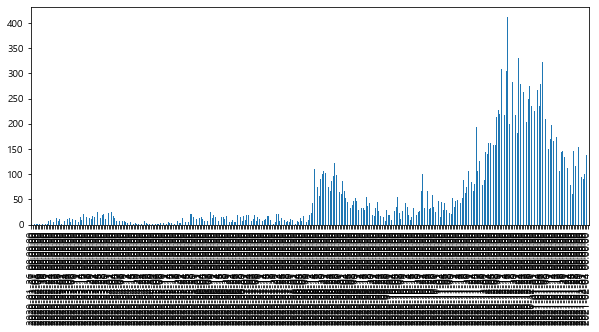

In [22]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
# 막대그래프는 선그래프와 달리 범주형데이터로 가정하기 때문에 선그래프와 같이 중간생략이 되지 않음
df["확진일자"].value_counts().sort_index().plot.bar(figsize=(10,4))

day_count = df["확진일자"].value_counts().sort_index()
day_count.plot.bar(figsize=(10,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

<AxesSubplot:>

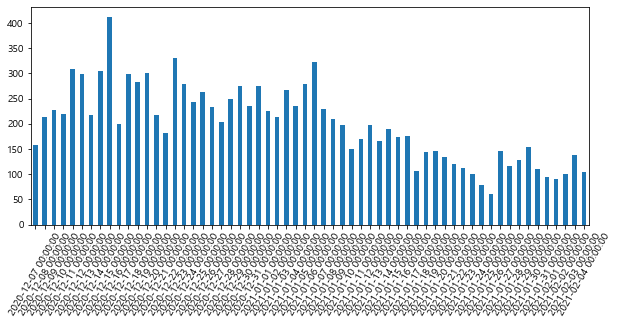

In [23]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
# rot: 글씨 기울기
day_count[-60:].plot.bar(figsize=(10,4),rot=60)

### 월별 확진자 수 그리기

<AxesSubplot:>

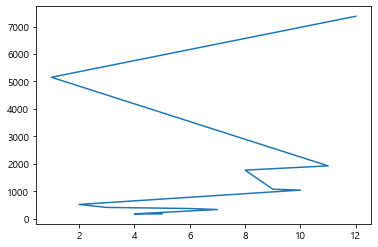

In [24]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
# 빈도수 순서대로 그려짐
df["월"].value_counts().plot()

<AxesSubplot:>

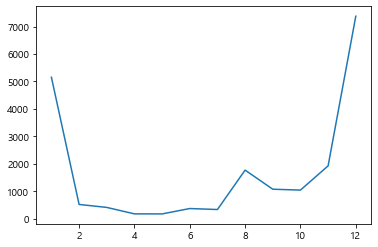

In [25]:
# index 순서대로
df["월"].value_counts().sort_index().plot()

<AxesSubplot:title={'center':'월별 확진자 수'}>

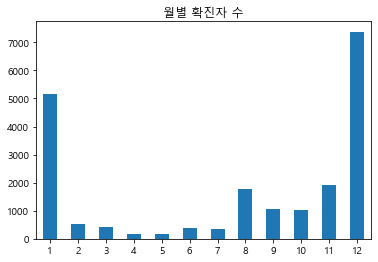

In [26]:
#막대그래프로
df["월"].value_counts().sort_index().plot.bar(rot=0,title='월별 확진자 수')

### 주단위 확진자수 그리기

In [27]:
# 주별로 빈도수를 구합니다.
df["주"].value_counts()

51    2014
53    1741
52    1734
50    1643
1     1623
2     1178
49    1040
3      835
4      811
48     750
34     654
35     622
47     537
5      436
36     389
33     357
43     350
46     291
37     281
44     270
38     239
41     215
45     212
42     183
39     173
40     126
12     122
14     117
13     113
24     103
23      89
22      86
27      85
28      83
30      83
25      80
11      78
26      76
32      72
29      67
10      62
9       58
15      51
31      45
21      43
20      26
16      22
8       22
19      17
17      16
18       9
6        6
7        1
Name: 주, dtype: int64

<AxesSubplot:title={'center':'주단위 확진자 수'}>

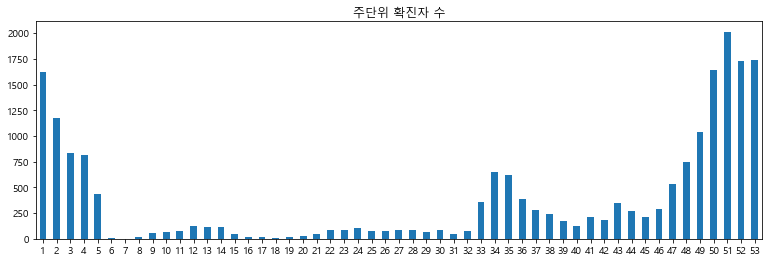

In [28]:
# 주단위 빈도수 막대그래프로 그리기
df["주"].value_counts().sort_index().plot.bar(figsize=(13,4),title='주단위 확진자 수',rot=0)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [29]:
df["확진일자"].value_counts().sort_index()
# 2020-01-25부터 2020-01-29까지 확진자 없으므로 비어있음

2020-01-26      1
2020-01-27      1
2020-02-01      1
2020-02-02      1
2020-02-05      2
             ... 
2021-01-31     94
2021-02-01     90
2021-02-02    100
2021-02-03    138
2021-02-04    105
Name: 확진일자, Length: 355, dtype: int64

In [30]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
first_day

Timestamp('2020-01-26 00:00:00')

In [31]:
last_day = df.iloc[0]["확진일자"]
last_day

Timestamp('2021-02-04 00:00:00')

In [32]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day,last_day)
days

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04',
               ...
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
               '2021-02-03', '2021-02-04'],
              dtype='datetime64[ns]', length=376, freq='D')

In [33]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()

df_days = days.to_frame()
df_days

,0
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
2020-01-29,2020-01-29
2020-01-30,2020-01-30
...,...
2021-01-31,2021-01-31
2021-02-01,2021-02-01
2021-02-02,2021-02-02
2021-02-03,2021-02-03


In [34]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts().sort_index()
daily_case

2020-01-26      1
2020-01-27      1
2020-02-01      1
2020-02-02      1
2020-02-05      2
             ... 
2021-01-31     94
2021-02-01     90
2021-02-02    100
2021-02-03    138
2021-02-04    105
Name: 확진일자, Length: 355, dtype: int64

In [35]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.reset_index()
df_daily_case

,index,확진일자
0,2020-01-26,1
1,2020-01-27,1
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-05,2
...,...,...
350,2021-01-31,94
351,2021-02-01,90
352,2021-02-02,100
353,2021-02-03,138


In [36]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
df_daily_case.columns = ["확진일자","확진수"]
df_daily_case

,확진일자,확진수
0,2020-01-26,1
1,2020-01-27,1
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-05,2
...,...,...
350,2021-01-31,94
351,2021-02-01,90
352,2021-02-02,100
353,2021-02-03,138


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [37]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, left_on=df_days.index, right_on="확진일자", how="left")
all_day = all_day.drop(0, axis=1)
all_day

,확진일자,확진수
0,2020-01-26,1.0
1,2020-01-27,1.0
2,2020-01-28,NaN
3,2020-01-29,NaN
4,2020-01-30,NaN
...,...,...
371,2021-01-31,94.0
372,2021-02-01,90.0
373,2021-02-02,100.0
374,2021-02-03,138.0


## 누적 확진자 수 구하기

In [38]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
all_day = all_day.fillna(0)
all_day

,확진일자,확진수
0,2020-01-26,1.0
1,2020-01-27,1.0
2,2020-01-28,0.0
3,2020-01-29,0.0
4,2020-01-30,0.0
...,...,...
371,2021-01-31,94.0
372,2021-02-01,90.0
373,2021-02-02,100.0
374,2021-02-03,138.0


In [39]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"] = all_day["확진일자"].astype(str).str[-5:]

In [40]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cum_day
all_day["누적확진"] = all_day["확진수"].cumsum()
all_day.head(20)

,확진일자,확진수,일자,누적확진
0,2020-01-26,1.0,01-26,1.0
1,2020-01-27,1.0,01-27,2.0
2,2020-01-28,0.0,01-28,2.0
3,2020-01-29,0.0,01-29,2.0
4,2020-01-30,0.0,01-30,2.0
5,2020-01-31,0.0,01-31,2.0
6,2020-02-01,1.0,02-01,3.0
7,2020-02-02,1.0,02-02,4.0
8,2020-02-03,0.0,02-03,4.0
9,2020-02-04,0.0,02-04,4.0


### 데이터프레임으로 그리기

<AxesSubplot:title={'center':'확진수와 누적확진 수'}, xlabel='확진일자'>

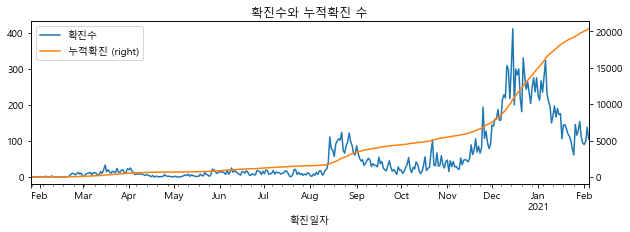

In [41]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
# 스케일 차이가 많이 나는 그래프를 동시에 그리는 것은 권장하는 방법은 아님
all_day.set_index("확진일자")[["확진수","누적확진"]].plot(figsize=(10,3),
                                               title="확진수와 누적확진 수",
                                              secondary_y="누적확진")

### 시리즈로 그리기

<AxesSubplot:xlabel='확진일자'>

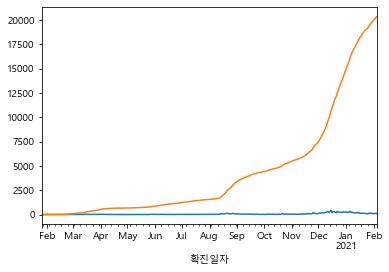

In [42]:
# 시리즈로 2개의 그래프 그리기
all_day.set_index("확진일자")["확진수"].plot()
all_day.set_index("확진일자")["누적확진"].plot()

### 확진수만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

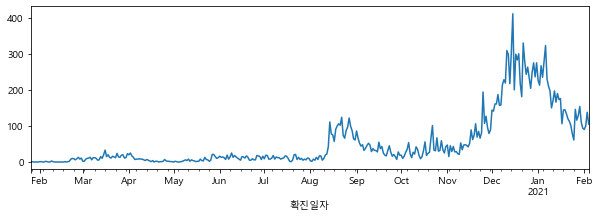

In [43]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
all_day.set_index("확진일자")["확진수"].plot(figsize=(10,3))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

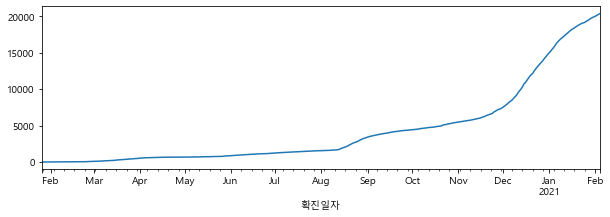

In [44]:
# 누적확진만 따로 그립니다.
all_day.set_index("확진일자")["누적확진"].plot(figsize=(10,3))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

In [45]:
np.log(all_day["확진수"]+1)
np.log1p(all_day["확진수"])
# 마이너스값이 무한대로 수렴하는 문제해결위해 +1해줌......(?)
# 위의 두 개는 같음

0      0.693147
1      0.693147
2      0.000000
3      0.000000
4      0.000000
         ...   
371    4.553877
372    4.510860
373    4.615121
374    4.934474
375    4.663439
Name: 확진수, Length: 376, dtype: float64

<AxesSubplot:>

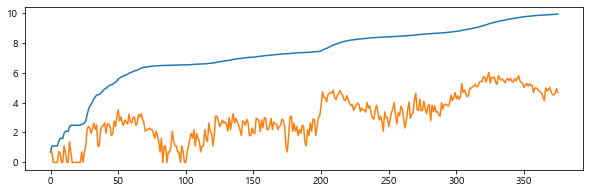

In [46]:
np.log1p(all_day["누적확진"]).plot(figsize=(10,3))
np.log1p(all_day['확진수']).plot()

## 확진월과 요일 구하기

In [47]:
# cum_day
# all_day
df_all_day = all_day.reset_index()
df_all_day["월"] = df_all_day["확진일자"].dt.month
df_all_day["요일"] = df_all_day["확진일자"].dt.dayofweek
df_all_day

,index,확진일자,확진수,일자,누적확진,월,요일
0,0,2020-01-26,1.0,01-26,1.0,1,6
1,1,2020-01-27,1.0,01-27,2.0,1,0
2,2,2020-01-28,0.0,01-28,2.0,1,1
3,3,2020-01-29,0.0,01-29,2.0,1,2
4,4,2020-01-30,0.0,01-30,2.0,1,3
...,...,...,...,...,...,...,...
371,371,2021-01-31,94.0,01-31,19903.0,1,6
372,372,2021-02-01,90.0,02-01,19993.0,2,0
373,373,2021-02-02,100.0,02-02,20093.0,2,1
374,374,2021-02-03,138.0,02-03,20231.0,2,2


In [48]:
#월별 모든 컬럼 sum
df_all_day.groupby("월").sum() 

,index,확진수,누적확진,요일
월,,,,
1,11051,5154.0,553634.0,115
2,2074,520.0,81285.0,95
3,1550,412.0,8373.0,91
4,2415,177.0,18984.0,89
5,3441,175.0,22760.0,99
6,4245,371.0,31586.0,85
7,5332,335.0,43678.0,93
8,6293,1771.0,67620.0,95
9,7005,1075.0,119813.0,87


In [49]:
#월별 확진수 sum
df_all_day.groupby("월")["확진수"].sum()

월
1     5154.0
2      520.0
3      412.0
4      177.0
5      175.0
6      371.0
7      335.0
8     1771.0
9     1075.0
10    1043.0
11    1926.0
12    7377.0
Name: 확진수, dtype: float64

### 요일별 확진 수 

In [50]:
# 요일별 확진수를 groupby로 구하기
# all_day_week
df_all_day.groupby(["요일"])["확진수"].sum()

요일
0    2446.0
1    3313.0
2    3141.0
3    3101.0
4    3042.0
5    2877.0
6    2416.0
Name: 확진수, dtype: float64

In [51]:
# 월별, 요일별 확진수를 groupby로 구하기
all_day_week = df_all_day.groupby(["월","요일"])["확진수"].sum().unstack()
all_day_week

요일,0,1,2,3,4,5,6
월,,,,,,,
1,611.0,766.0,739.0,669.0,876.0,797.0,696.0
2,100.0,107.0,149.0,120.0,10.0,20.0,14.0
3,71.0,80.0,49.0,43.0,58.0,52.0,59.0
4,19.0,15.0,34.0,36.0,31.0,26.0,16.0
5,12.0,15.0,32.0,30.0,35.0,26.0,25.0
6,47.0,78.0,47.0,47.0,56.0,60.0,36.0
7,31.0,57.0,61.0,67.0,63.0,29.0,27.0
8,202.0,202.0,232.0,277.0,329.0,309.0,220.0
9,94.0,220.0,237.0,163.0,132.0,131.0,98.0


In [52]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [53]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
월,,,,,,,
1,611.0,766.0,739.0,669.0,876.0,797.0,696.0
2,100.0,107.0,149.0,120.0,10.0,20.0,14.0
3,71.0,80.0,49.0,43.0,58.0,52.0,59.0
4,19.0,15.0,34.0,36.0,31.0,26.0,16.0
5,12.0,15.0,32.0,30.0,35.0,26.0,25.0
6,47.0,78.0,47.0,47.0,56.0,60.0,36.0
7,31.0,57.0,61.0,67.0,63.0,29.0,27.0
8,202.0,202.0,232.0,277.0,329.0,309.0,220.0
9,94.0,220.0,237.0,163.0,132.0,131.0,98.0


In [54]:
# style.background_gradient 로 색상을 표현합니다.
#색상(color map)은 구글에 matplotlib cmap 검색
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

all_day_week.astype(int).style.background_gradient(cmap='Blues')

,월,화,수,목,금,토,일
월,,,,,,,
1,611,766,739,669,876,797,696
2,100,107,149,120,10,20,14
3,71,80,49,43,58,52,59
4,19,15,34,36,31,26,16
5,12,15,32,30,35,26,25
6,47,78,47,47,56,60,36
7,31,57,61,67,63,29,27
8,202,202,232,277,329,309,220
9,94,220,237,163,132,131,98


In [55]:
#행열전환
all_day_week.astype(int).T.style.background_gradient(cmap='Blues')

월,1,2,3,4,5,6,7,8,9,10,11,12
월,611,100,71,19,12,47,31,202,94,124,243,892
화,766,107,80,15,15,78,57,202,220,131,268,1374
수,739,149,49,34,32,47,61,232,237,158,319,1084
목,669,120,43,36,30,47,67,277,163,181,271,1197
금,876,10,58,31,35,56,63,329,132,127,309,1016
토,797,20,52,26,26,60,29,309,131,168,240,1019
일,696,14,59,16,25,36,27,220,98,154,276,795


## 거주지별 확진자

In [64]:
# 지역별 확진자의 빈도수를 구하고 시각화 합니다.
region_count = df["지역"].value_counts()
region_count

부천       1551
의정부       871
평택        841
성남분당      803
고양덕양      771
김포        699
고양일산동     686
파주        657
용인기흥      640
화성        608
시흥        607
광주        595
용인수지      595
남양주       594
군포        582
광명        571
안산단원      568
안양동안      541
성남수정      489
안산상록      473
안양만안      448
남양주풍양     413
수원권선      398
고양일산서     396
구리        396
성남중원      356
하남        344
수원영통      323
양주        311
평택송탄      301
수원장안      301
포천        300
수원팔달      258
오산        255
이천        235
양평        229
용인처인      217
의왕        182
안성        173
여주        172
평택안중      152
가평        125
연천        115
동두천       103
과천         90
고양          1
Name: 지역, dtype: int64

<AxesSubplot:>

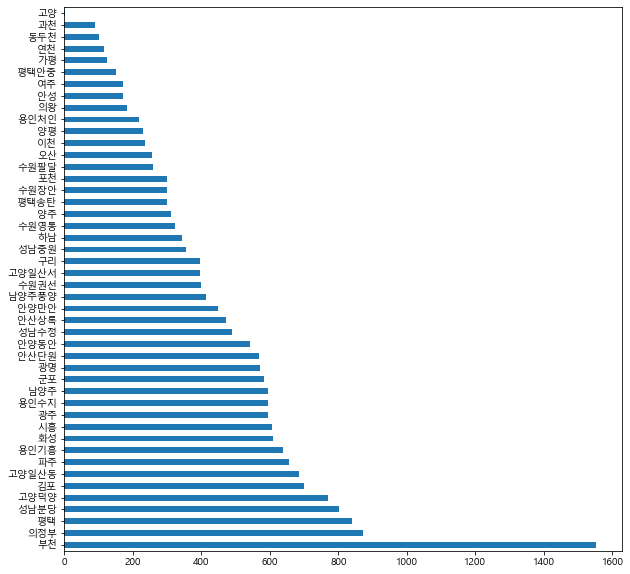

In [65]:
# 지역별 확진자의 수를 시각화 합니다.
region_count.plot.barh(figsize=(10,10))

<AxesSubplot:>

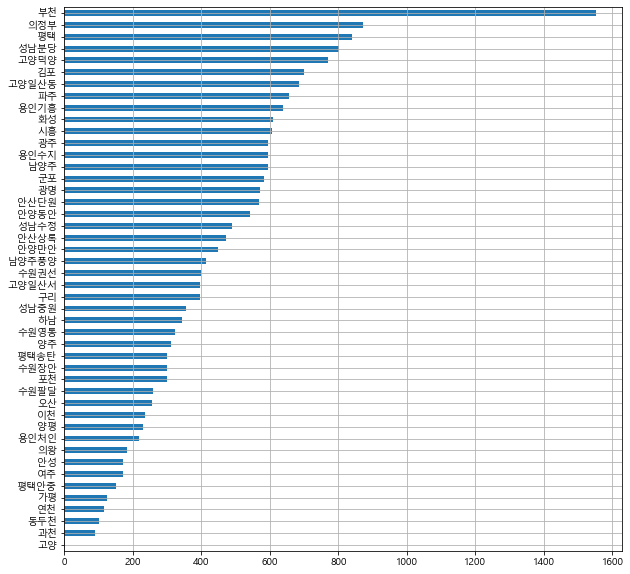

In [66]:
# 빈도수 많은구부터
region_count.sort_values().plot.barh(figsize=(10,10),grid=True)

In [67]:
region_count.index

Index(['부천', '의정부', '평택', '성남분당', '고양덕양', '김포', '고양일산동', '파주', '용인기흥', '화성',
       '시흥', '광주', '용인수지', '남양주', '군포', '광명', '안산단원', '안양동안', '성남수정', '안산상록',
       '안양만안', '남양주풍양', '수원권선', '고양일산서', '구리', '성남중원', '하남', '수원영통', '양주',
       '평택송탄', '수원장안', '포천', '수원팔달', '오산', '이천', '양평', '용인처인', '의왕', '안성',
       '여주', '평택안중', '가평', '연천', '동두천', '과천', '고양'],
      dtype='object')

## 감염경로

In [68]:
# 감염경로 빈도수를 구합니다.
df["감염경로"].value_counts()

불명확        18762
해외유입        1435
서울_콜센터        54
대구경북_일반       44
과천_신천지        22
대구_신천지        15
천안세종_줌바        4
Name: 감염경로, dtype: int64

In [75]:
# 감염경로의 unique 값만 구합니다.
df["감염경로"].unique()

array(['불명확', '해외유입', '서울_콜센터', '대구경북_일반', '과천_신천지', '천안세종_줌바', '대구_신천지'],
      dtype=object)

In [76]:
# "불명확"인 감염경로만 찾습니다.
df[df["감염경로"].str.contains("불명확")]

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월,주
0,20336,80121,M,73,70,2021-02-04,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN,2,5
1,20335,80131,M,34,30,2021-02-04,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN,2,5
2,20334,80122,F,62,60,2021-02-04,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN,2,5
3,20333,80104,F,64,60,2021-02-04,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN,2,5
4,20332,80103,M,39,30,2021-02-04,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20282,54,1255,F,35,30,2020-02-26,2020. 2. 19.,,광명-1,광명,,불명확,grp27,Primary,,Primary,2,9
20284,52,1402,M,34,30,2020-02-26,2020. 2. 23.,,용인-2,용인수지,,불명확,grp25,Primary,,Primary,2,9
20293,43,927,F,34,30,2020-02-25,2020. 2. 23.,,안양-4,안양만안,,불명확,grp20,Primary,,Primary,2,9
20296,40,1155,F,55,50,2020-02-24,2020. 2. 21.,,부천-9,부천,,불명확,grp18,Primary,,Primary,2,9


<AxesSubplot:>

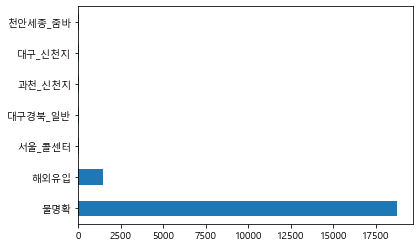

In [78]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["감염경로"].value_counts()
contact_count.plot.barh()

In [81]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.
contact_count.sort_values().tail(10).index

Index(['천안세종_줌바', '대구_신천지', '과천_신천지', '대구경북_일반', '서울_콜센터', '해외유입', '불명확'], dtype='object')

In [83]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
df.groupby(["감염경로","월"])["연번"].count()

감염경로     월 
과천_신천지   2       11
         3       11
대구_신천지   2       14
         3        1
대구경북_일반  2       34
         3       10
불명확      1     4905
         2      431
         3      228
         4       82
         5      149
         6      313
         7      163
         8     1678
         9      996
         10     914
         11    1742
         12    7161
서울_콜센터   3       53
         4        1
천안세종_줌바  3        4
해외유입     1      249
         2       30
         3      105
         4       94
         5       26
         6       58
         7      172
         8       93
         9       79
         10     129
         11     184
         12     216
Name: 연번, dtype: int64

In [86]:
# unstack() :테이블형태로
# fillna(0) :na값 0으로 대체
# astype(int) : int(정수형)으로 변환
df.groupby(["감염경로","월"])["연번"].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6,7,8,9,10,11,12
감염경로,,,,,,,,,,,,
과천_신천지,0,11,11,0,0,0,0,0,0,0,0,0
대구_신천지,0,14,1,0,0,0,0,0,0,0,0,0
대구경북_일반,0,34,10,0,0,0,0,0,0,0,0,0
불명확,4905,431,228,82,149,313,163,1678,996,914,1742,7161
서울_콜센터,0,0,53,1,0,0,0,0,0,0,0,0
천안세종_줌바,0,0,4,0,0,0,0,0,0,0,0,0
해외유입,249,30,105,94,26,58,172,93,79,129,184,216


### 감염경로 불명

In [90]:
# "감염경로" 가 "불명확"인 데이터만 구합니다.
df_unknown = df[df["감염경로"] == "불명확"]
df_unknown

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월,주
0,20336,80121,M,73,70,2021-02-04,2021. 2. 2.,,고양-1862,고양일산서,,불명확,,NaN,,NaN,2,5
1,20335,80131,M,34,30,2021-02-04,NaN,무증상,수원-1342,수원권선,,불명확,,NaN,,NaN,2,5
2,20334,80122,F,62,60,2021-02-04,NaN,무증상,용인-1454,용인수지,,불명확,,NaN,,NaN,2,5
3,20333,80104,F,64,60,2021-02-04,2021. 1. 29.,,성남-1644,성남분당,,불명확,,NaN,,NaN,2,5
4,20332,80103,M,39,30,2021-02-04,2021. 2. 3.,,성남-1643,성남분당,,불명확,,NaN,,NaN,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20282,54,1255,F,35,30,2020-02-26,2020. 2. 19.,,광명-1,광명,,불명확,grp27,Primary,,Primary,2,9
20284,52,1402,M,34,30,2020-02-26,2020. 2. 23.,,용인-2,용인수지,,불명확,grp25,Primary,,Primary,2,9
20293,43,927,F,34,30,2020-02-25,2020. 2. 23.,,안양-4,안양만안,,불명확,grp20,Primary,,Primary,2,9
20296,40,1155,F,55,50,2020-02-24,2020. 2. 21.,,부천-9,부천,,불명확,grp18,Primary,,Primary,2,9


<AxesSubplot:xlabel='월,주'>

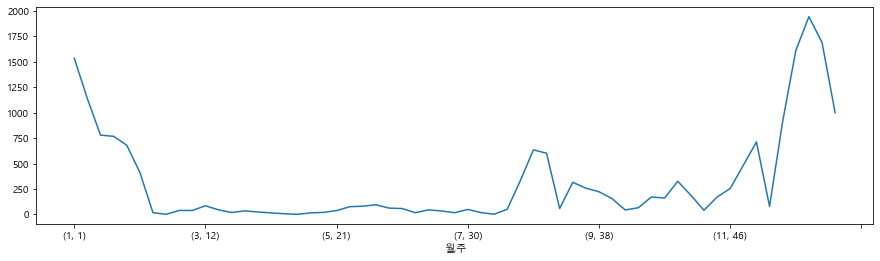

In [93]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월","주"])["연번"].count()
unknown_weekly_case.plot(figsize=(15,4))

In [99]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.head()

,주
51,2014
53,1741
52,1734
50,1643
1,1623


In [100]:
# 컬럼명 변경
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
51,2014
53,1741
52,1734
50,1643
1,1623


In [102]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
51,1945
52,1691
53,1680
50,1611
1,1537


In [105]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.
unknown_case = all_weekly_case.merge(unknown_weekly_case, 
                                     left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
1,1623,1537
2,1178,1139
3,835,780
4,811,768
5,436,414


<AxesSubplot:>

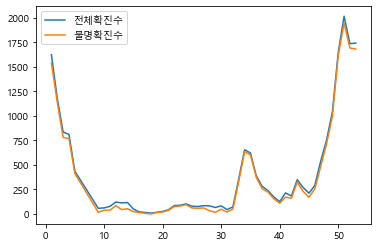

In [106]:
# 위에서 구한 결과를 시각화 합니다.
unknown_case.plot()

In [108]:
# 감염경로 "확인 중"의 주별 비율
(unknown_case["불명확진수"]/unknown_case["전체확진수"]) *100

1     94.701171
2     96.689304
3     93.413174
4     94.697904
5     94.954128
9     31.034483
10    62.903226
11    50.000000
12    69.672131
13    39.823009
14    46.153846
15    47.058824
16    68.181818
17    43.750000
18    11.111111
19    88.235294
20    76.923077
21    88.372093
22    88.372093
23    91.011236
24    92.233010
25    77.500000
26    76.315789
27    72.941176
28    40.963855
29    25.373134
30    59.036145
31    44.444444
32    69.444444
33    92.717087
34    97.094801
35    96.784566
36    96.143959
37    91.814947
38    93.305439
39    89.595376
40    87.301587
41    80.000000
42    87.978142
43    93.142857
44    85.185185
45    80.660377
46    87.628866
47    89.944134
48    95.066667
49    95.576923
50    98.052343
51    96.573982
52    97.520185
53    96.496267
dtype: float64

In [109]:
# unknown_case에 새로운 컬럼으로 넣기
unknown_case["확인중비율"] = (unknown_case["불명확진수"]/unknown_case["전체확진수"]) *100
unknown_case

,전체확진수,불명확진수,확인중비율
1,1623,1537,94.701171
2,1178,1139,96.689304
3,835,780,93.413174
4,811,768,94.697904
5,436,414,94.954128
9,58,18,31.034483
10,62,39,62.903226
11,78,39,50.000000
12,122,85,69.672131
13,113,45,39.823009


<AxesSubplot:>

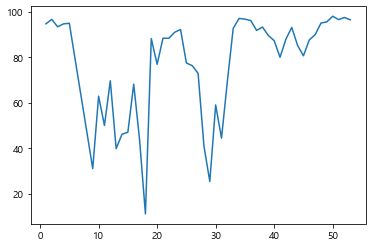

In [112]:
unknown_case["확인중비율"].plot()